# 3. Logistic Regression
Treating the problem as a classification problem, appy logistic regression. 

# (a) White Wine

Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sys

Reading data from csv. 

The goal is to predict wine's quality based on alcohol and sulphates, the most prompinent features.
We have two features  and two classes: (1) and (0).

In [2]:
data = pd.read_csv('/home/mscuser/Desktop/winequality-white.csv', sep=';')
X1 = data[['alcohol','sulphates']].values
y1 = data['quality'].values
y=[]
for i in y1:
    if i>5:
        y.append(1)
    else:
        y.append(0)

In order to map predicted values to probabilities, we use the sigmoid function. 
The function maps any real value into another value between 0 and 1. 

In [3]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))


Using knowledge of sigmoid functions and decision boundaries, we can now write a prediction function. 
A prediction function in logistic regression returns the probability of our observation being positive

In [4]:
def predict(features, weights):
    z = np.dot(features, weights)
    return sigmoid(z)

Calculation of cost function

In [5]:
def cost_function(features, labels, weights):
    #Cost = ( log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    
    observations = len(labels)
    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum()/observations

    return cost

To minimize the cost, Gradient Descent is used. 

In [6]:
def update_weights(features, labels, weights, lr):
    
    N = len(features)
    predictions = predict(features, weights)
    gradient = np.dot(features.T,  predictions - labels)
    #average cost derivative for each feature
    gradient /= N
    #Multiply the gradient by our learning rate
    gradient *= lr
    #minimize cost
    weights -= gradient
    return weights

Training a model is the process of iteratively improving your prediction equation by looping through the 
dataset multiple times, each time updating the weight and bias values in the direction indicated by the slope
of the cost function (gradient). 
Training is complete when we reach an acceptable error threshold, or when subsequent training iterations fail
to reduce the cost.

In [7]:
def train(features, labels, weights, lr, iters):
    
    cost_history = []
    w1 = [0] * iters
    
    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)
        w1[i] = weights
        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
    
    return w1, cost_history

In [8]:
weights = [0, 0]
w, cost = train(X1, np.array(y), weights, 0.001, 1000)

In the following graph it is clear tha the model is working,
as the cost is decreasing after every iteration.

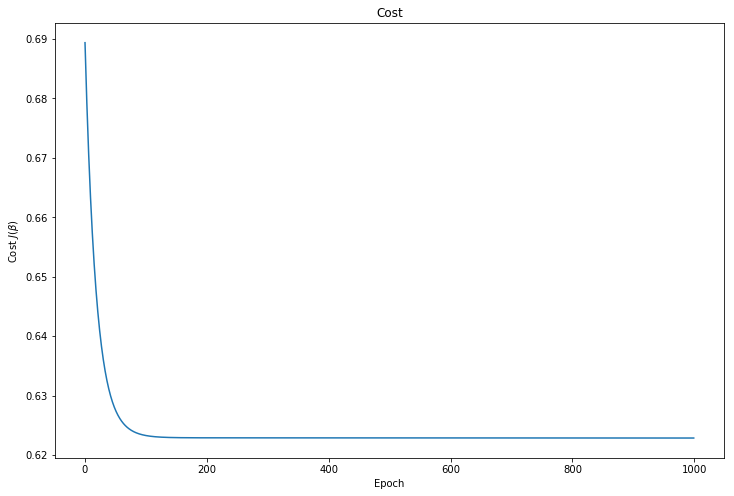

In [9]:
ffig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_xlabel("Epoch")
ax1.set_ylabel(r"Cost $J(\beta)$")
ax1.plot(cost)
ax1.set_title("Cost")
plt.show()

In order to decide which function is more suitable for logistic regression, we have to look at the graph above
and compare it to the equivalant Mean squared error graph. By observation it is clear which function is the best. We 
choose the one that need less iterations in order to converge. 

Source: http://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html#cost-function